<a href="https://colab.research.google.com/github/ryandhikafm/DTI-Telkom/blob/Titanic/Titanic_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preprocessing

In [ ]:
table = pd.read_csv('train.csv')
table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
table.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
table_kosong = ['Age', 'Cabin', 'Embarked']
table_kosong

['Age', 'Cabin', 'Embarked']

In [ ]:
table[table_kosong].T

In [ ]:
median_age = table['Age'].median()

In [ ]:
index_null_age = table['Age'].isna()

In [ ]:
table.loc[index_null_age, 'Age'] = median_age

In [ ]:
table.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
table['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

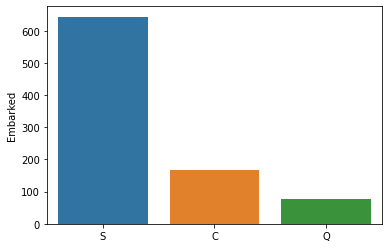

In [ ]:
sns.barplot(x=table['Embarked'].value_counts().index,
            y=table['Embarked'].value_counts())

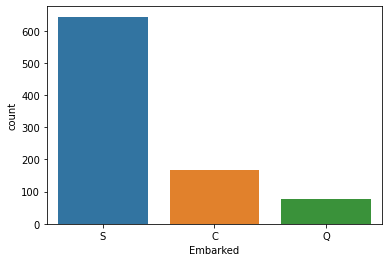

In [ ]:
sns.countplot(x = 'Embarked', data = table)

In [ ]:
table['Embarked'] = table['Embarked'].fillna('S')

In [ ]:
table.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
table.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## EDA

In [ ]:
numeric_feat = table.dtypes[table.dtypes != 'object'].index

In [ ]:
numeric_feat

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

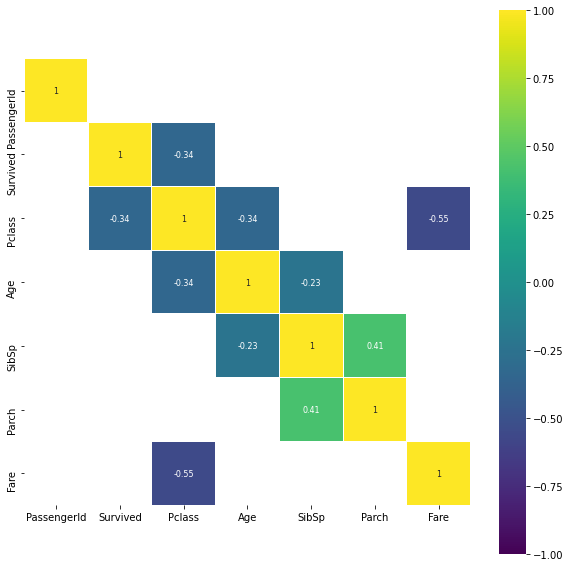

In [ ]:
corrmat = table[numeric_feat].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat[(corrmat >= 0.4) | (corrmat <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

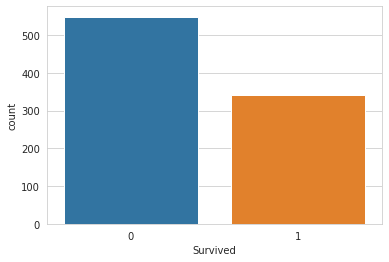

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = table)

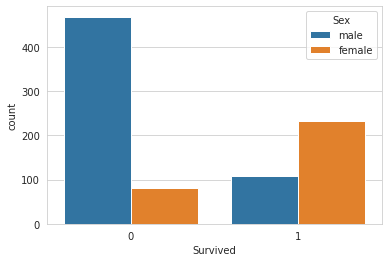

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = table)

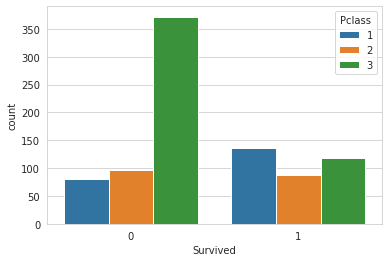

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = table)

In [ ]:
table['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
table.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
table.drop(['Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [ ]:
table.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [ ]:
table = table.set_index('PassengerId')

In [ ]:
table.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [ ]:
numeric_feat = table.dtypes[table.dtypes != 'object'].index

In [ ]:
table['FamSize'] = table['SibSp'] + table['Parch']
table.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,1
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,0
4,1,1,female,35.0,1,0,53.1000,1
5,0,3,male,35.0,0,0,8.0500,0


In [ ]:
table.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
table.head()

,Survived,Pclass,Sex,Age,Fare,FamSize
PassengerId,,,,,,
1,0,3,male,22.0,7.2500,1
2,1,1,female,38.0,71.2833,1
3,1,3,female,26.0,7.9250,0
4,1,1,female,35.0,53.1000,1
5,0,3,male,35.0,8.0500,0


In [ ]:
table['Pclass'] = table['Pclass'].map({1: 'FirstClass', 2: 'SecondClass', 3 : 'ThirdClass'})
table.head()

,Survived,Pclass,Sex,Age,Fare,FamSize
PassengerId,,,,,,
1,0,ThirdClass,male,22.0,7.2500,1
2,1,FirstClass,female,38.0,71.2833,1
3,1,ThirdClass,female,26.0,7.9250,0
4,1,FirstClass,female,35.0,53.1000,1
5,0,ThirdClass,male,35.0,8.0500,0


In [ ]:
pclass = pd.get_dummies(table['Pclass'])
pclass.head()

,FirstClass,SecondClass,ThirdClass
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1


In [ ]:
sex = pd.get_dummies(table['Sex'])
sex.head()

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [ ]:
table = pd.concat([table, pclass, sex], axis = 1)

In [ ]:
table.head()

,Survived,Pclass,Sex,Age,Fare,FamSize,FirstClass,SecondClass,ThirdClass,female,male
PassengerId,,,,,,,,,,,
1,0,ThirdClass,male,22.0,7.2500,1,0,0,1,0,1
2,1,FirstClass,female,38.0,71.2833,1,1,0,0,1,0
3,1,ThirdClass,female,26.0,7.9250,0,0,0,1,1,0
4,1,FirstClass,female,35.0,53.1000,1,1,0,0,1,0
5,0,ThirdClass,male,35.0,8.0500,0,0,0,1,0,1


In [ ]:
table.drop(['Pclass', 'Sex'], axis = 1, inplace = True)

In [ ]:
table.head()

,Survived,Age,Fare,FamSize,FirstClass,SecondClass,ThirdClass,female,male
PassengerId,,,,,,,,,
1,0,22.0,7.2500,1,0,0,1,0,1
2,1,38.0,71.2833,1,1,0,0,1,0
3,1,26.0,7.9250,0,0,0,1,1,0
4,1,35.0,53.1000,1,1,0,0,1,0
5,0,35.0,8.0500,0,0,0,1,0,1


## Modelling

In [ ]:
X = table.drop(['Survived'], axis = 1)
y = table['Survived']

In [ ]:
# Set Training and Testing Data (80:20)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(X , y, shuffle = True, test_size=0.2, random_state=42)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [43]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [44]:
# Modeling Decision Tree
model_tree = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
model_tree.fit(X_train, y_train)

# Predict to Test Data 
y_pred_tree = model_tree.predict(X_test)

In [45]:
# Show the Confussion Matrix
cm_tree = metrics.confusion_matrix(y_test, y_pred_tree)
cm_tree

array([[92, 13],
       [23, 51]])

In [48]:
# Modeling Random Forest Classifier
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

# Predict to Test Data
y_pred_forest = model_forest.predict(X_test)

In [49]:
# Show the Confussion Matrix

cm_forest = metrics.confusion_matrix(y_test, y_pred_forest)
cm_forest

array([[90, 15],
       [18, 56]])

In [50]:
y_pred_forest

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [54]:
# Modeling Naive Bayes Classifier
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

# Predict to Test Data
y_pred_naive = model_naive.predict(X_test)

In [55]:
# Show the Confussion Matrix

cm_naive = metrics.confusion_matrix(y_test, y_pred_naive)
cm_naive

array([[85, 20],
       [22, 52]])

In [61]:
# menghitung metrics decision tree

acc_dtc = metrics.accuracy_score(y_test, y_pred_tree)
prec_dtc = metrics.precision_score(y_test, y_pred_tree)
rec_dtc = metrics.recall_score(y_test, y_pred_tree)
f1_dtc = metrics.f1_score(y_test, y_pred_tree)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_tree)

In [62]:
# menghitung metrics random forest

acc_rf = metrics.accuracy_score(y_test, y_pred_forest)
prec_rf = metrics.precision_score(y_test, y_pred_forest)
rec_rf = metrics.recall_score(y_test, y_pred_forest)
f1_rf = metrics.f1_score(y_test, y_pred_forest)
kappa_rf = metrics.cohen_kappa_score(y_test, y_pred_forest)

In [63]:
# menghitung metrics naive bayes

acc_gnb = metrics.accuracy_score(y_test, y_pred_naive)
prec_gnb = metrics.precision_score(y_test, y_pred_naive)
rec_gnb = metrics.recall_score(y_test, y_pred_naive)
f1_gnb = metrics.f1_score(y_test, y_pred_naive)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_naive)

In [64]:
print("MODEL DECISION TREE")
print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

MODEL DECISION TREE
Accuracy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891
F1 Score: 0.7391304347826088
Cohens Kappa Score: 0.5768877216021011


In [65]:
print("MODEL RANDOM FOREST")

print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("Cohens Kappa Score:", kappa_rf)

MODEL RANDOM FOREST
Accuracy: 0.8156424581005587
Precision: 0.7887323943661971
Recall: 0.7567567567567568
F1 Score: 0.7724137931034482
Cohens Kappa Score: 0.6175956496407069


In [66]:
print("MODEL NAIVE BAYES")

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

MODEL NAIVE BAYES
Accuracy: 0.7653631284916201
Precision: 0.7222222222222222
Recall: 0.7027027027027027
F1 Score: 0.7123287671232876
Cohens Kappa Score: 0.5142783305336607


## Predict New Data

In [70]:
test_table = pd.read_csv('test.csv')
test_table.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
test_table.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
test_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [75]:
median_fare = test_table['Fare'].median()

In [78]:
index_null_fare = test_table['Fare'].isna()

In [79]:
test_table.loc[index_null_fare, 'Fare'] = median_fare

In [93]:
median_age = test_table['Age'].median()
index_null_age = test_table['Age'].isna()
test_table.loc[index_null_age, 'Age'] = median_age

In [81]:
test_table['FamSize'] = test_table['SibSp'] + test_table['Parch']
test_table.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [82]:
test_table = test_table.set_index('PassengerId')
test_table.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [83]:
test_table['Pclass'] = test_table['Pclass'].map({1: 'FirstClass', 2: 'SecondClass', 3 : 'ThirdClass'})

In [84]:
test_pclass = pd.get_dummies(test_table['Pclass'])

In [85]:
test_sex = pd.get_dummies(test_table['Sex'])

In [86]:
test_table = pd.concat([test_table, test_pclass, test_sex], axis = 1)

In [87]:
test_table.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,FirstClass,SecondClass,ThirdClass,female,male
PassengerId,,,,,,,,,,,,,,,,
892,ThirdClass,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,1,0,1
893,ThirdClass,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1,1,0
894,SecondClass,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,1
895,ThirdClass,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1,0,1
896,ThirdClass,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0,0,1,1,0


In [88]:
test_table.drop(['Pclass','Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test_table.head()

,Age,Fare,Embarked,FamSize,FirstClass,SecondClass,ThirdClass,female,male
PassengerId,,,,,,,,,
892,34.5,7.8292,Q,0,0,0,1,0,1
893,47.0,7.0000,S,1,0,0,1,1,0
894,62.0,9.6875,Q,0,0,1,0,0,1
895,27.0,8.6625,S,0,0,0,1,0,1
896,22.0,12.2875,S,2,0,0,1,1,0


In [89]:
test_table.drop(['Embarked'], axis = 1, inplace = True)
test_table.head()

,Age,Fare,FamSize,FirstClass,SecondClass,ThirdClass,female,male
PassengerId,,,,,,,,
892,34.5,7.8292,0,0,0,1,0,1
893,47.0,7.0000,1,0,0,1,1,0
894,62.0,9.6875,0,0,1,0,0,1
895,27.0,8.6625,0,0,0,1,0,1
896,22.0,12.2875,2,0,0,1,1,0


In [90]:
new_feature = test_table

In [97]:
new_predicted_forest = pd.DataFrame(model_forest.predict(new_feature), columns = ['survived_random_forest'])
new_predicted_forest.reset_index()
new_predicted_forest

,survived_random_forest
0,0
1,0
2,1
3,1
4,1
...,...
413,0
414,1
415,0
416,0


In [98]:
# Save Prediction Result
new_predicted_forest.to_csv('new_survived_prediction.csv', index=False)

In [100]:
import pickle
model_forest.fit(X_train, y_train)  
pickle.dump(model_forest, open('model_titanic.pkl', 'wb'))